## Importing The Libaries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re


import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("./input"))

['.DS_Store', 'youtube-comments-sentiment-analysis.log', 'youtube']


In [8]:
pd.set_option('display.max_columns',None)

## Loading The Data

In [9]:
US_comments = pd.read_csv('./input/youtube/UScomments.csv', error_bad_lines=False)

In [10]:
US_videos = pd.read_csv('./input/youtube/USvideos.csv', error_bad_lines=False)

In [11]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09


## Let's do some analysis and Data Cleaning on both the datasets.

In [12]:
US_videos.shape

(1, 11)

In [13]:
US_videos.nunique()

video_id          1
title             1
channel_title     1
category_id       1
tags              1
views             1
likes             1
dislikes          1
comment_total     1
thumbnail_link    1
date              1
dtype: int64

In [14]:
US_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        1 non-null      object 
 1   title           1 non-null      object 
 2   channel_title   1 non-null      object 
 3   category_id     1 non-null      int64  
 4   tags            1 non-null      object 
 5   views           1 non-null      int64  
 6   likes           1 non-null      int64  
 7   dislikes        1 non-null      int64  
 8   comment_total   1 non-null      int64  
 9   thumbnail_link  1 non-null      object 
 10  date            1 non-null      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 216.0+ bytes


In [15]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09


In [16]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [17]:
US_comments.shape

(100, 4)

In [18]:
US_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [19]:
US_comments.dropna(inplace=True)

In [20]:
US_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [21]:
US_comments.shape

(100, 4)

In [22]:
US_comments.nunique()

video_id          1
comment_text    100
likes             5
replies           1
dtype: int64

In [23]:
US_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      100 non-null    object
 1   comment_text  100 non-null    object
 2   likes         100 non-null    int64 
 3   replies       100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [24]:
# US_comments.drop(41587, inplace=True)

In [25]:
US_comments = US_comments.reset_index().drop('index',axis=1)

In [26]:
US_comments.likes = US_comments.likes.astype(int)
US_comments.replies = US_comments.replies.astype(int)

In [27]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Removing Punctuations, Numbers and Special Characters.

In [28]:
US_comments['comment_text'] = US_comments['comment_text'].str.replace("[^a-zA-Z#]", " ")

## Removing Short Words.

In [29]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

## Changing the text to lower case.

In [30]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x:x.lower())

## Tokenization

In [31]:
tokenized_tweet = US_comments['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

## Lemmatization

In [36]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
# nltk.download('wordnet')

from nltk import WordNetLemmatizer
from nltk.corpus import stopwords


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [37]:
wnl = WordNetLemmatizer()

In [38]:
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))]) 
tokenized_tweet.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

In [39]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [40]:
US_comments['comment_text'] = tokenized_tweet

## Let's do the Sentiment Analysis on the US Comments Dataset

In [41]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jiamingli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

## Setting The Sentiment Scores

In [43]:
US_comments['Sentiment Scores'] = US_comments['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [44]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,XpVt6Z1Gjjo,logan paul,4,0,0.0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0
3,XpVt6Z1Gjjo,attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending,3,0,0.0


## Classifying the Sentiment scores as Positive, Negative and Neutral

In [45]:
US_comments['Sentiment'] = US_comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [46]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores,Sentiment
0,XpVt6Z1Gjjo,logan paul,4,0,0.0,Neutral
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0,Neutral
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0,Neutral
3,XpVt6Z1Gjjo,attendance,3,0,0.0,Neutral
4,XpVt6Z1Gjjo,trending,3,0,0.0,Neutral


In [47]:
US_comments.Sentiment.value_counts()

Neutral     43
Positive    37
Negative    20
Name: Sentiment, dtype: int64

## Now we will calculate the percentage of comments which are positive in all the videos.

In [48]:
videos = []
for i in range(0,US_comments.video_id.nunique()):
    a = US_comments[(US_comments.video_id == US_comments.video_id.unique()[i]) & (US_comments.Sentiment == 'Positive')].count()[0]
    b = US_comments[US_comments.video_id == US_comments.video_id.unique()[i]]['Sentiment'].value_counts().sum()
    Percentage = (a/b)*100
    videos.append(round(Percentage,2))

## Making a dataframe of the videos with their Positive Percentages.

In [49]:
Positivity = pd.DataFrame(videos,US_comments.video_id.unique()).reset_index()

In [50]:
Positivity.columns = ['video_id','Positive Percentage']

In [51]:
Positivity.head()

,video_id,Positive Percentage
0,XpVt6Z1Gjjo,37.0


## Now we will add the channel name of the videos which are their in our new dataset.

In [52]:
channels = []
for i in range(0,Positivity.video_id.nunique()):
    channels.append(US_videos[US_videos.video_id == Positivity.video_id.unique()[i]]['channel_title'].unique()[0])

In [53]:
Positivity['Channel'] = channels

In [54]:
Positivity.head()

,video_id,Positive Percentage,Channel
0,XpVt6Z1Gjjo,37.0,Logan Paul Vlogs


In [55]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].max()]

,video_id,Positive Percentage,Channel
0,XpVt6Z1Gjjo,37.0,Logan Paul Vlogs


## So these are the videos and their channels whose comments are 100% Positive (Well, this might be less likely because NLTK is poor with sarcasmic comments but i can say that most of the comments are positive).

In [56]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].min()]

,video_id,Positive Percentage,Channel
0,XpVt6Z1Gjjo,37.0,Logan Paul Vlogs


## So these are the videos and their channels whose comments are 0% Positive (Means the comments are either Negative or Neutral. This stat is also less likely but as i said earlier, MOSTLY).

## Let's Contstruct a wordcloud of all the comments to see the most frequent comments.

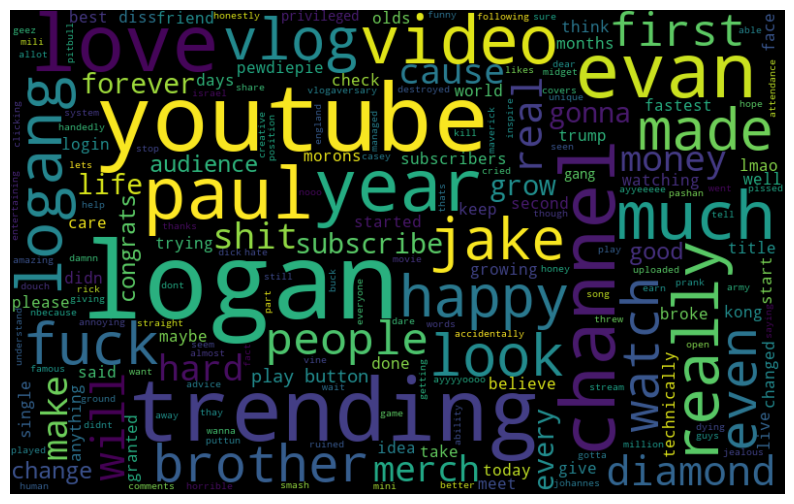

In [59]:
all_words = ' '.join([text for text in US_comments['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Construct a Wordcloud of Positive Comments

In [60]:
all_words_posi = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Positive']])

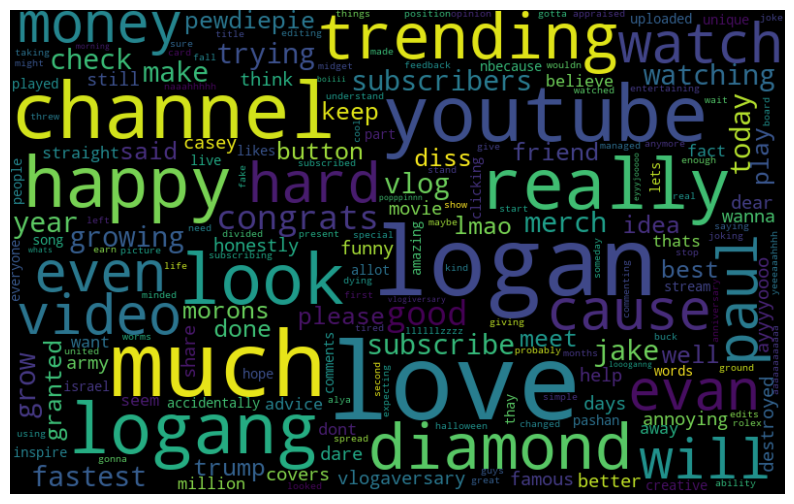

In [61]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Construct a Wordcloud of Negative Comments

In [62]:
all_words_nega = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Negative']])

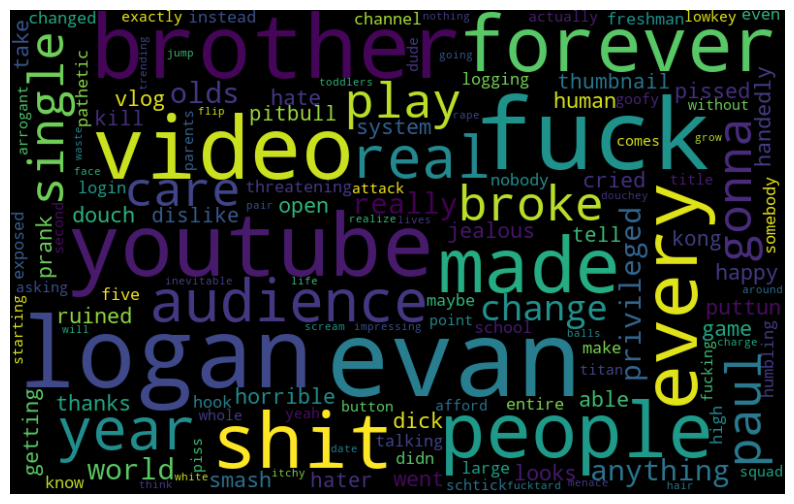

In [63]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Contsruct a Wordcloud of Neutral Comments.

In [64]:
all_words_neu = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Neutral']])

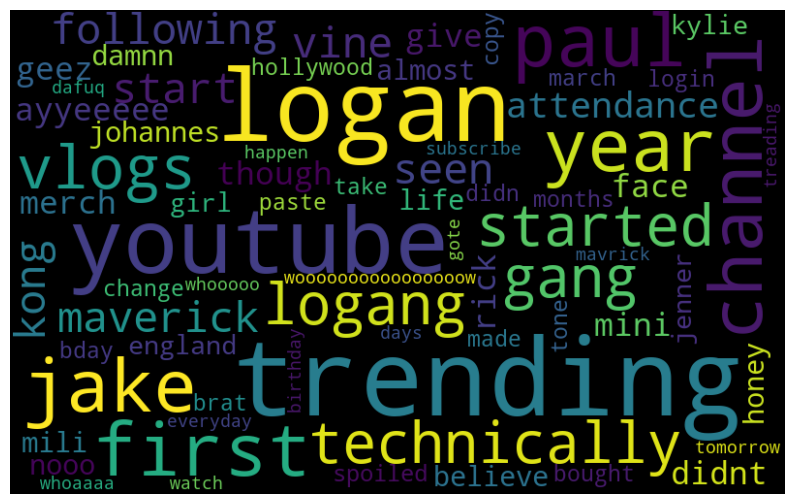

In [65]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()